# 1st Assignment: Analyse your graph

Il grafo di riferimento, preso da [snap.stanford.edu](http://snap.stanford.edu/data/p2p-Gnutella31.html), contiene come nodi i terminali connessi alla rete p2p gnutella, e come archi l'interconnessione tra questi terminali.
Il grafo è non diretto.

Scopo di questa relazione è ricavare le caratteristiche generali del grafo, fino ad arrivare alla sua classificazione. In contemporanea si andrà a rispondere alle domande richieste da consegna, alcune della quali utili per lo svolgimento del 2nd assignment.

Nel notebook verranno utilizzate diverse librerie, tra cui networkx. 

In [1]:
import networkx
graph = networkx.read_edgelist("../graphs/p2p-Gnutella31.txt")
#graph = networkx.gnp_random_graph(100, 0.02)


In [2]:
print("Number of nodes: ", len(graph))
print("Number of edges: ", graph.number_of_edges())

Number of nodes:  62586
Number of edges:  147892


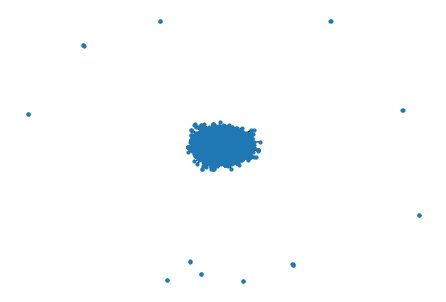

In [3]:
import matplotlib.pyplot as plt

networkx.draw(graph, with_labels=False, node_size=10)
plt.show()

In [4]:
import collections

def average_degree(graph):
    """
    Calculate the average degree of the network
    :param graph: the networkx Graph() object
    :return: the average degree of the network
    """
    k = map(lambda d: d[1], graph.degree())
    return sum(list(k)) / graph.number_of_nodes()

print("Avarage degree: ", average_degree(graph))

Avarage degree:  4.726040967628543


Text(0.5, 0, 'Degree')

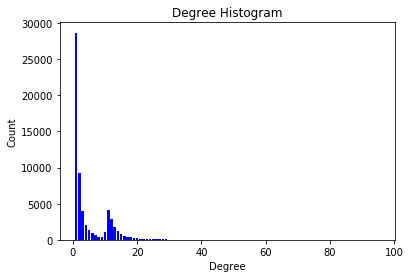

In [5]:
# Plot istrogramma degree

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")



In [6]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)

components = sorted(connected_component_subgraphs(graph), key=len, reverse=True)
print("There are ", len(components), " connected components")
print("Giant component size: ", len(components[0]))



There are  12  connected components
Giant component size:  62561


In [ ]:
# Plot del grafo con le varie componenti connesse colorate con diversi colori
# identify largest connected component
import pydot
from networkx.drawing.nx_pydot import graphviz_layout



pos = graphviz_layout(graph)

networkx.draw(graph, pos, with_labels=False, node_size=10)
# Getting largest connected component
graphcc = sorted(networkx.connected_components(graph), key=len, reverse=True)
graph0 = graph.subgraph(graphcc[0])
networkx.draw_networkx_edges(graph0, pos,
                        with_labels=False,
                        edge_color='r',
                        width=3.0
                        )
# show other connected components
for Gi in graphcc[1:]:
    if len(Gi) > 1:
        networkx.draw_networkx_edges(graph.subgraph(Gi), pos,
                                with_labels=False,
                                edge_color='r',
                                alpha=0.3,
                                width=2.0
                                )



In [ ]:
print("Diameter of gian component: ", networkx.diameter(components[0])) 


In [ ]:
print("Average shortes path: ", networkx.average_shortest_path_length(components[0]))

Dai risultati precedenti si è ricavato che il diametro del grafo è: INSERT HERE, mentre lo shortest path è: INSERT HERE. 

############ Sembrerebbe quindi che il grafo sia poco denso

In [ ]:
print("Density: ", networkx.density(graph))


Come ipotizzato in precedenza la densità del grafo è bassa

In [ ]:
print("Average clustering coefficient: ", networkx.average_clustering(graph))

In [ ]:
print("Assortivity: ", networkx.correlation.degree_assortativity_coefficient(graph))

In [ ]:
# TODO Classificazione del grafo (non so come farla)

## Nodi importanti

In questa sezione si andrà ad analizzare quale nodi sono più importanti di altri, in base a metriche descritte in precedenza.

Questi nodi saranno poi target di attacchi per il 2nd assignment.

In [ ]:
print("10 nodi con degree maggiore")
dict(sorted(graph.degree, key=lambda x: x[1], reverse=True)[:10])

In [ ]:
import operator

print("10 nodi con maggiore closeness")
dict(sorted(networkx.closeness_centrality(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


In [ ]:
print("10 nodi con maggiore betweenness")
dict(sorted(networkx.betweenness_centrality(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])
